<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Tetration_and_Fibonacci_Tetration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. What is Tetration?
Tetration is a **hyper-operation** that extends exponentiation by iterating it multiple times. It is defined as:

$
a \uparrow^h = a^{a^{a^{\cdots}}}
$

Where:
- $ a $ is the **base**.
- $ h $ is the **height** (number of exponentiations).

### ** Recursive Definition:**
$
a \uparrow^1 = a
$
$
a \uparrow^h = a^{(a \uparrow^{(h-1)})}
$

For example:
$
2 \uparrow^3 = 2^{(2^2)} = 2^4 = 16
$

---

## 2. Fibonacci-Tetration
Fibonacci-Tetration **combines the Fibonacci sequence** with **tetration**, using Fibonacci numbers to define the exponentiation height.

### ** Fibonacci Sequence:**
The Fibonacci sequence is defined recursively as:

$
F(n) =
\begin{cases}
1, & \text{if } n = 1 \text{ or } 2 \\
F(n-1) + F(n-2), & \text{for } n > 2
\end{cases}
$

This produces:
$
1, 1, 2, 3, 5, 8, 13, \dots
$

### **Fibonacci-Tetration Definition:**
$
a \uparrow^{F(n)} = a \uparrow^{(F(n-1) + F(n-2))}
$

Where:
- The **height** of tetration follows the **Fibonacci sequence**.

For example, if $ a = 1.5 $ and $ F(n) = 5 $:

$
1.5 \uparrow^5 = 1.5^{(1.5^{(1.5^{(1.5^{1.5})})})}
$

Since Fibonacci numbers grow rapidly, the **tetration height increases extremely fast**, leading to **hyper-exponential growth**.

---

## 3. Visualization of Fibonacci-Tetration
- **Forward Sweep:** Standard Fibonacci-tetration.
- **Reverse Sweep:** Applying Fibonacci sequence **in reverse** to observe decay behavior.

**Logarithmic plots** help visualize this extreme growth.

**Tetration and Fibonacci-Tetration are essential in complex dynamical systems and hyper-exponential computations!**


In [11]:
def tetration(base, height):
    """Computes tetration of base to the given height."""
    if height == 1:
        return base
    return base ** tetration(base, height - 1)

# Example usage:
base = 2
height = 4  # This computes 2^(2^(2^2))
result = tetration(base, height)
print(f"Tetration result of {base} ↑↑ {height} is: {result}")

Tetration result of 2 ↑↑ 4 is: 65536


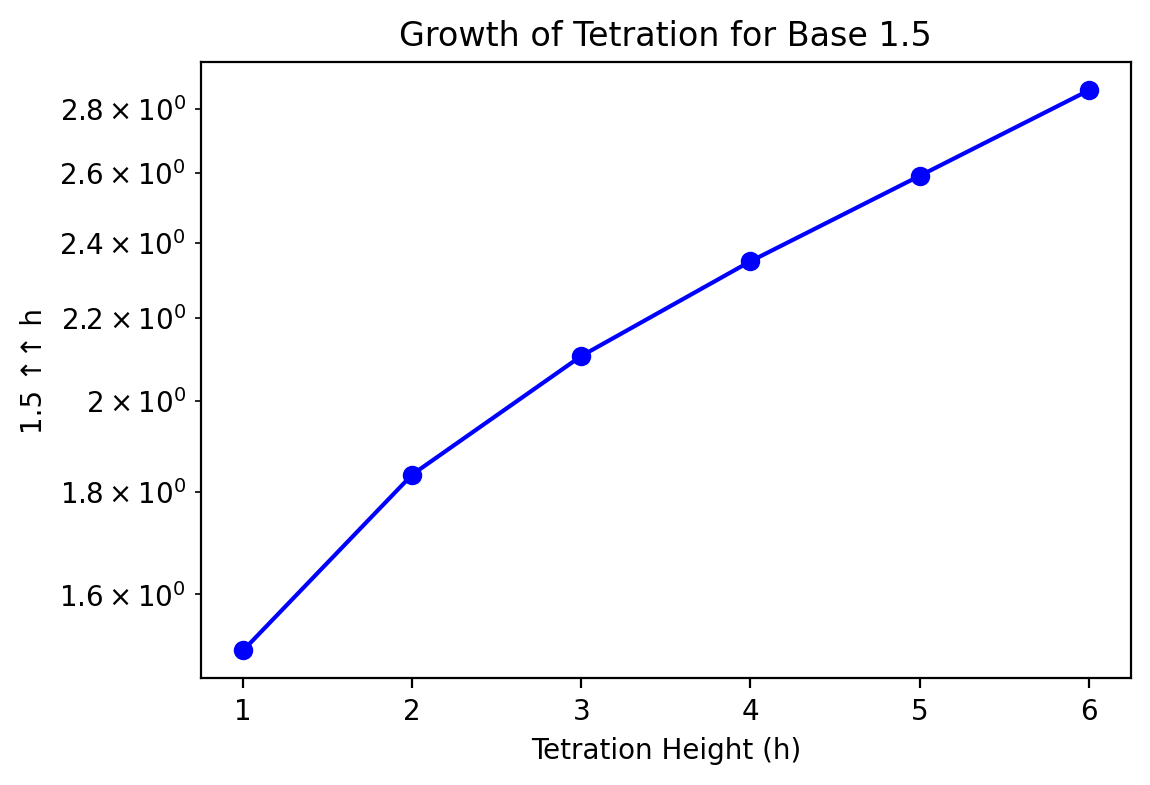

In [12]:
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

def tetration(base, height):
    """Computes tetration of base to the given height."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Prevent excessive growth
            return float('inf')
    return result

# Parameters
base = 1.5  # Change the base to see different growth behaviors
max_height = 6  # Tetration height range

# Compute values
heights = list(range(1, max_height + 1))
values = [tetration(base, h) for h in heights]

# Plot the growth of tetration
plt.figure(figsize=(6, 4))
plt.plot(heights, values, marker='o', linestyle='-', color='b')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel("Tetration Height (h)")
plt.ylabel(f"{base} ↑↑ h")
plt.title(f"Growth of Tetration for Base {base}")
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


<ipython-input-13-086ebcd0b61e>:8: RuntimeWarning: overflow encountered in scalar power
  result = base ** result


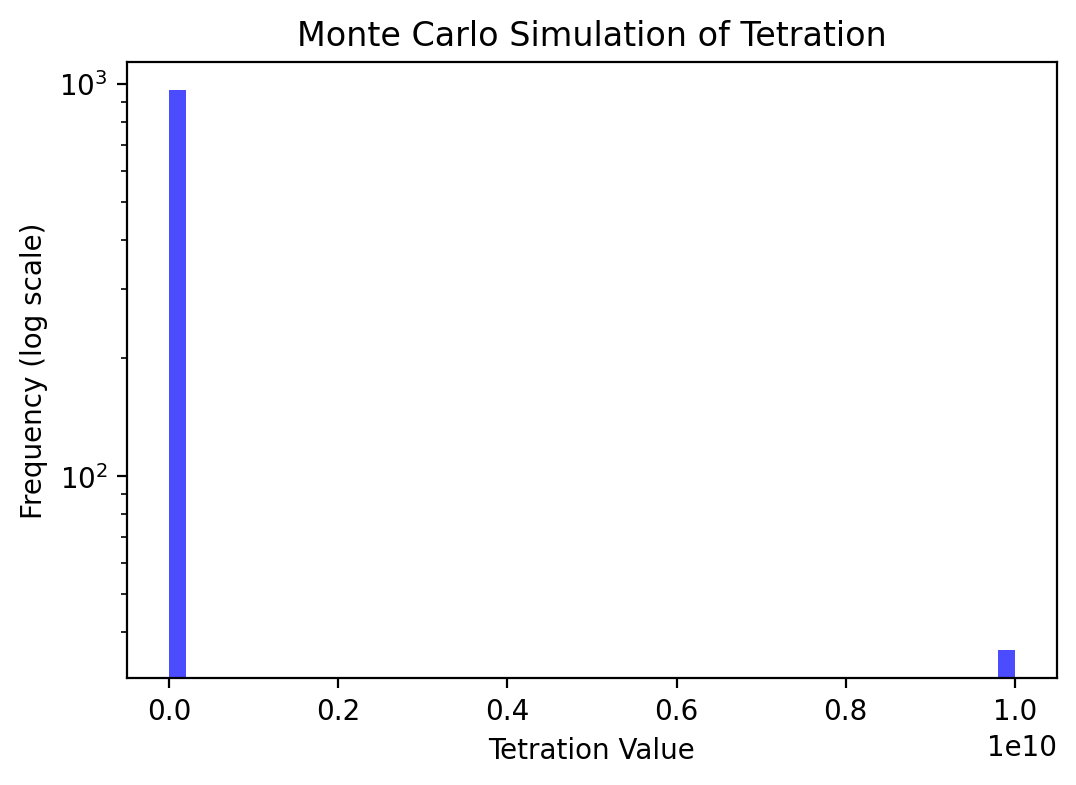

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def tetration(base, height):
    """Computes tetration of base to the given height."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Prevent overflow
            return float('inf')
    return result

# Monte Carlo Simulation Parameters
num_samples = 1000  # Number of random trials
base_min, base_max = 1.1, 2.0  # Base range
height_min, height_max = 1, 5  # Height range

# Randomly sample bases and heights
random_bases = np.random.uniform(base_min, base_max, num_samples)
random_heights = np.random.randint(height_min, height_max + 1, num_samples)

# Compute tetration values
tetration_results = [tetration(base, height) for base, height in zip(random_bases, random_heights)]

# Convert infinite values to a large number for plotting
tetration_results = np.array(tetration_results)
tetration_results[tetration_results == float('inf')] = 1e10

# Plot histogram of tetration results (log scale)
plt.figure(figsize=(6, 4))
plt.hist(tetration_results, bins=50, color='b', alpha=0.7, log=True)
plt.xlabel("Tetration Value")
plt.ylabel("Frequency (log scale)")
plt.title("Monte Carlo Simulation of Tetration")
# plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

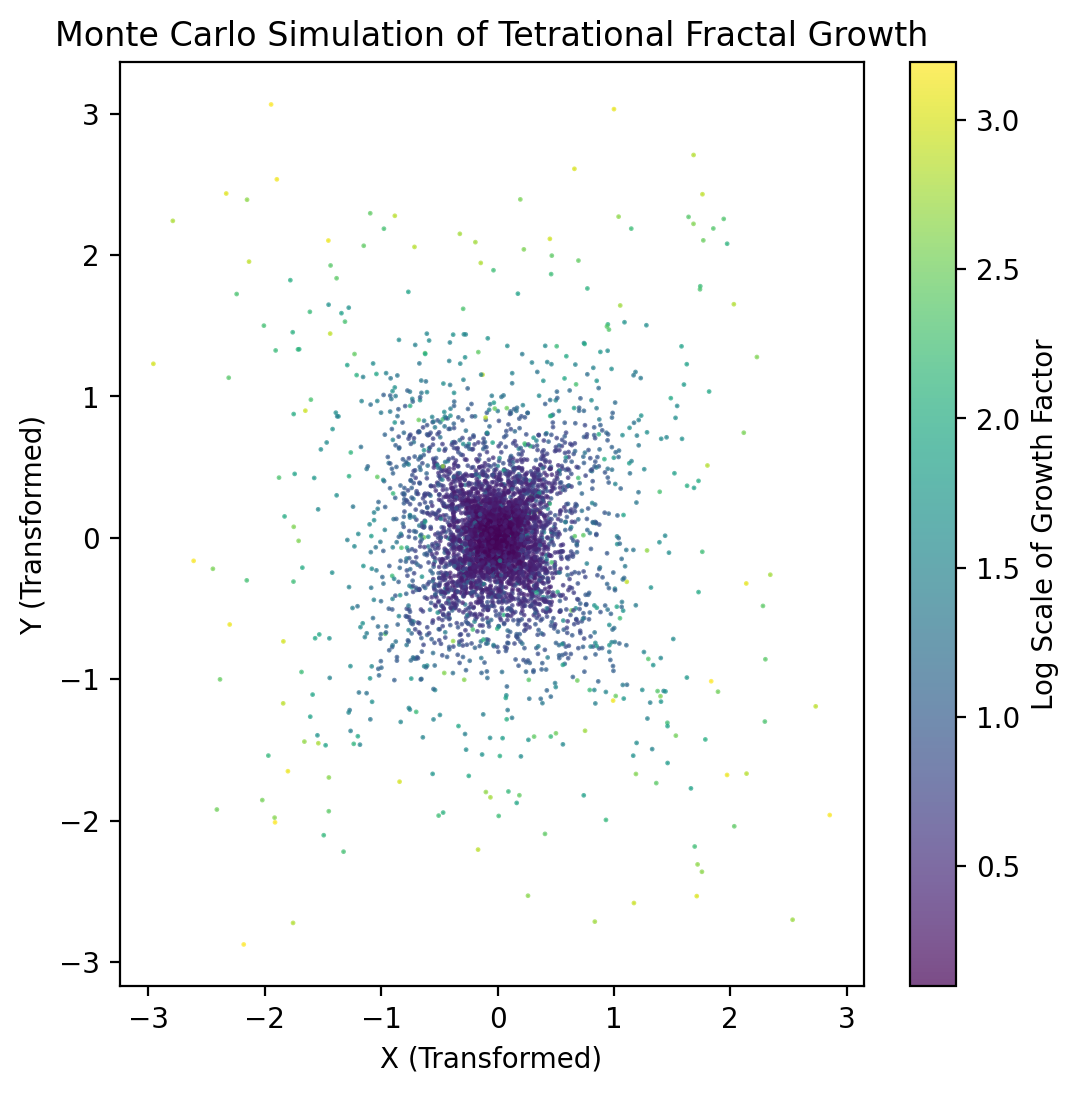

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def tetration(base, height):
    """Computes tetration iteratively to prevent recursion issues."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e5:  # Cap to prevent extreme growth
            return float('inf')
    return result

# Monte Carlo Simulation Parameters
num_points = 5000  # Number of random points
base_min, base_max = 1.1, 1.8  # Base range
height_min, height_max = 1, 4  # Height range

# Generate random initial points in a unit square
x = np.random.uniform(-1, 1, num_points)
y = np.random.uniform(-1, 1, num_points)

# Randomly sample bases and heights for each point
random_bases = np.random.uniform(base_min, base_max, num_points)
random_heights = np.random.randint(height_min, height_max + 1, num_points)

# Apply tetration-based transformation for fractal effect
scale_factors = np.array([tetration(base, height) for base, height in zip(random_bases, random_heights)])
scale_factors[scale_factors == float('inf')] = 10  # Cap overflow cases

# Transform the points based on tetration
x_transformed = x * np.log(scale_factors)
y_transformed = y * np.log(scale_factors)

# Plot the fractal-like structure
plt.figure(figsize=(6, 6))
plt.scatter(x_transformed, y_transformed, s=0.5, alpha=0.7, c=np.log(scale_factors), cmap='viridis')
plt.xlabel("X (Transformed)")
plt.ylabel("Y (Transformed)")
plt.title("Monte Carlo Simulation of Tetrational Fractal Growth")
# plt.grid(True, linestyle="--", linewidth=0.5)
plt.colorbar(label="Log Scale of Growth Factor")
plt.show()

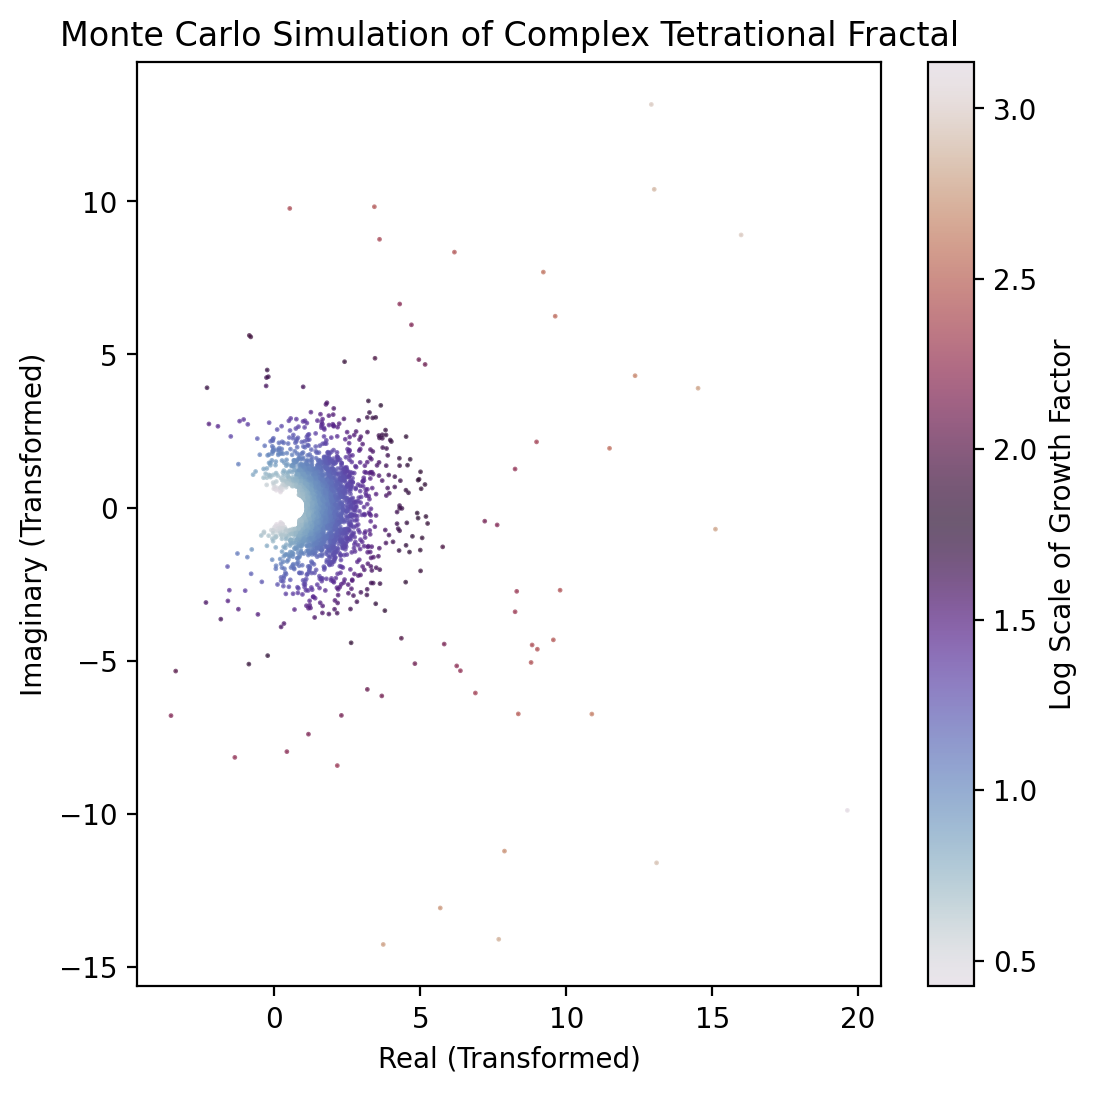

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def tetration_complex(base, height):
    """Computes tetration using complex numbers."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if abs(result) > 1e5:  # Cap to prevent extreme divergence
            return np.inf
    return result

# Monte Carlo Simulation Parameters
num_points = 5000  # Number of random points
base_min, base_max = 1.1, 1.8  # Base range (real)
height_min, height_max = 1, 4  # Height range

# Generate random points in the complex plane
angles = np.random.uniform(0, 2 * np.pi, num_points)  # Uniform angle distribution
radii = np.sqrt(np.random.uniform(0, 1, num_points))  # Uniform disk distribution
x = radii * np.cos(angles)
y = radii * np.sin(angles)
complex_points = x + 1j * y  # Convert to complex numbers

# Randomly sample bases and heights for each point
random_bases = np.random.uniform(base_min, base_max, num_points) + 1j * np.random.uniform(-0.5, 0.5, num_points)
random_heights = np.random.randint(height_min, height_max + 1, num_points)

# Apply tetration-based transformation
transformed_points = np.array([tetration_complex(base, height) for base, height in zip(random_bases, random_heights)])

# Filter out infinite values
finite_mask = np.isfinite(transformed_points)
x_transformed = np.real(transformed_points[finite_mask])
y_transformed = np.imag(transformed_points[finite_mask])
color_map = np.log1p(np.abs(transformed_points[finite_mask]))  # Log scale for visualization

# Plot the fractal-like structure
plt.figure(figsize=(6, 6))
plt.scatter(x_transformed, y_transformed, s=0.5, alpha=0.7, c=color_map, cmap='twilight')
plt.xlabel("Real (Transformed)")
plt.ylabel("Imaginary (Transformed)")
plt.title("Monte Carlo Simulation of Complex Tetrational Fractal")
# plt.grid(True, linestyle="--", linewidth=0.5)
plt.colorbar(label="Log Scale of Growth Factor")
plt.show()

<ipython-input-16-725fca5241a3>:8: RuntimeWarning: overflow encountered in scalar power
  result = base ** result


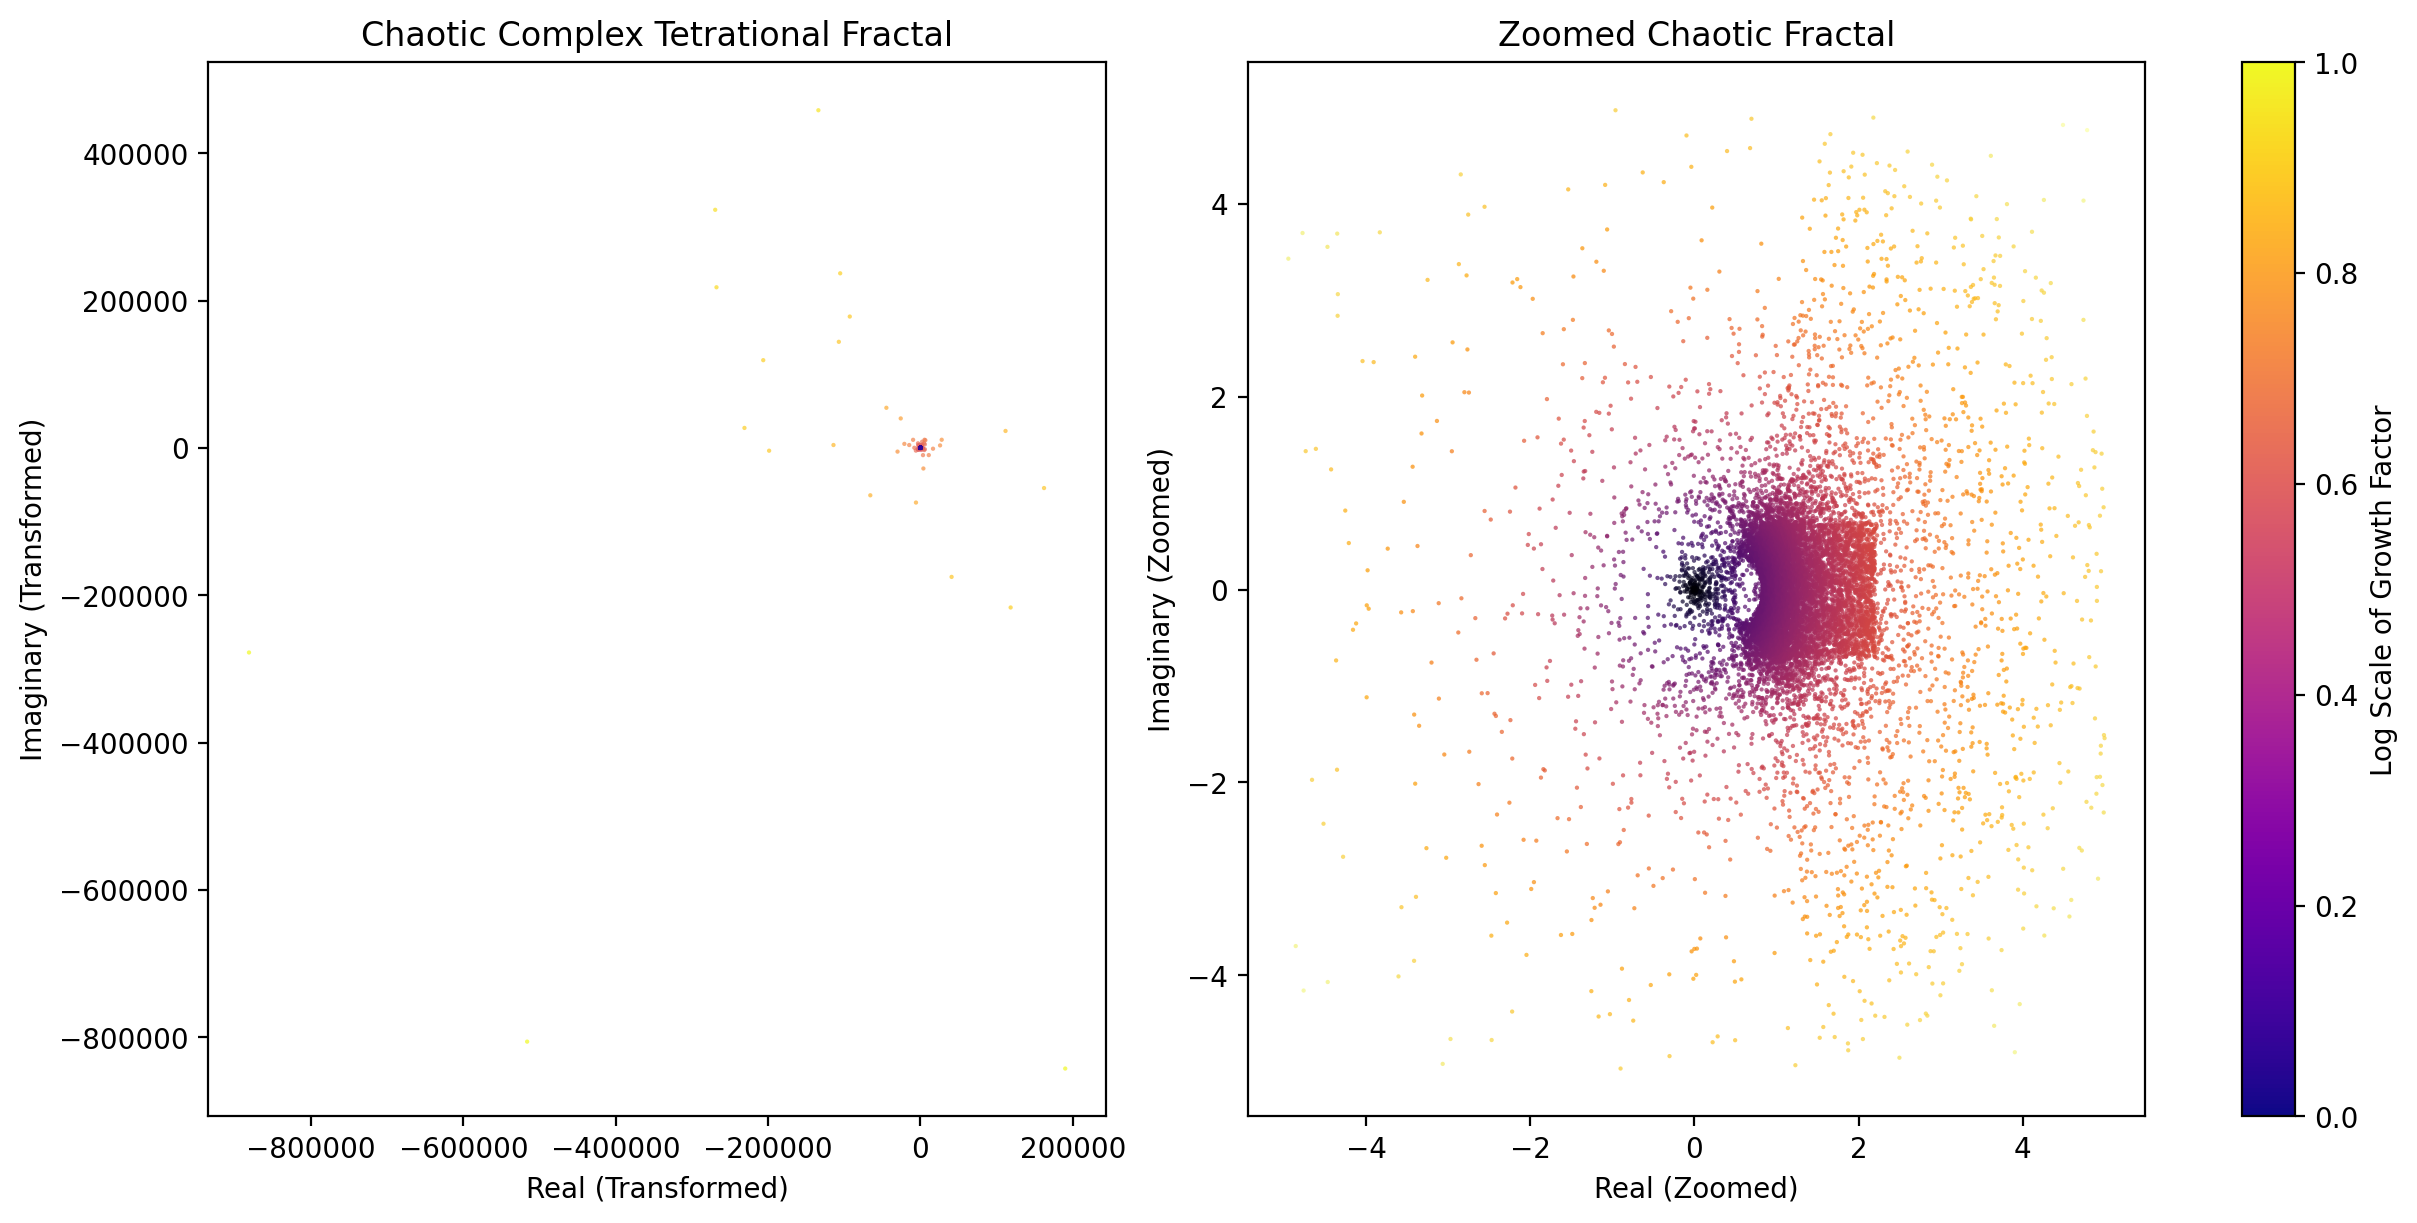

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def tetration_complex(base, height):
    """Computes tetration using complex numbers."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if abs(result) > 1e6:  # Cap to prevent extreme divergence
            return np.inf
    return result

# Chaotic Fractal Parameters
num_points = 15000  # Moderate density for better visualization
base_min, base_max = 0.8, 2.2  # More unstable range
height_min, height_max = 1, 6  # Increased maximum height

# Generate chaotic points
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points))
x = radii * np.cos(angles) + np.random.normal(0, 0.05, num_points)  # Added noise
y = radii * np.sin(angles) + np.random.normal(0, 0.05, num_points)
complex_points = x + 1j * y

# Sample bases and heights
random_bases = np.random.uniform(base_min, base_max, num_points) + 1j * np.random.uniform(-0.7, 0.7, num_points)
random_heights = np.random.randint(height_min, height_max + 1, num_points)

# Apply tetration-based transformation
transformed_points = np.array([tetration_complex(base, height) for base, height in zip(random_bases, random_heights)])

# Filter out infinite values
finite_mask = np.isfinite(transformed_points)
x_transformed = np.real(transformed_points[finite_mask])
y_transformed = np.imag(transformed_points[finite_mask])
color_map = np.log1p(np.abs(transformed_points[finite_mask]))

# Create subplots with a tight layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Left Plot: Standard Chaotic Fractal
axes[0].scatter(x_transformed, y_transformed, s=0.3, alpha=0.7, c=color_map, cmap='plasma')
axes[0].set_xlabel("Real (Transformed)")
axes[0].set_ylabel("Imaginary (Transformed)")
axes[0].set_title("Chaotic Complex Tetrational Fractal")
# axes[0].grid(True, linestyle="--", linewidth=0.5)

# Right Plot: Zoomed-In Chaotic Section
zoom_mask = (np.abs(x_transformed) < 5) & (np.abs(y_transformed) < 5)
axes[1].scatter(x_transformed[zoom_mask], y_transformed[zoom_mask], s=0.3, alpha=0.7, c=color_map[zoom_mask], cmap='inferno')
axes[1].set_xlabel("Real (Zoomed)")
axes[1].set_ylabel("Imaginary (Zoomed)")
axes[1].set_title("Zoomed Chaotic Fractal")
# axes[1].grid(True, linestyle="--", linewidth=0.5)

plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=axes, label="Log Scale of Growth Factor")
plt.show()


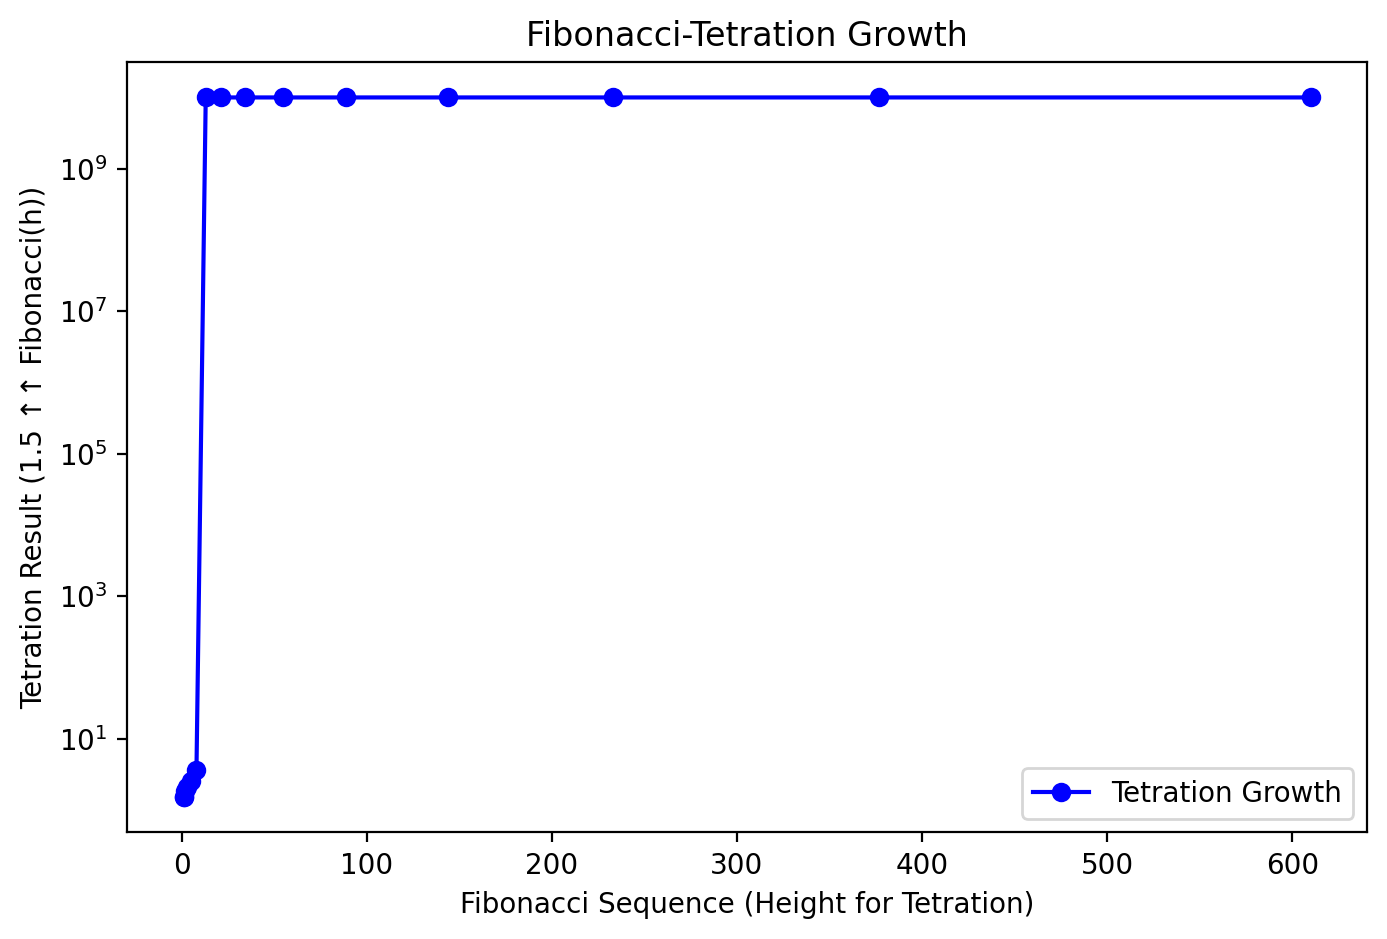

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def fibonacci(n):
    """Generates the first n Fibonacci numbers."""
    fib_seq = [1, 1]
    for _ in range(n - 2):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

def tetration(base, height):
    """Computes tetration iteratively to prevent recursion issues."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Cap to prevent extreme growth
            return float('inf')
    return result

# Parameters
num_terms = 15  # Number of Fibonacci numbers
base = 1.5  # Fixed base for tetration

# Generate Fibonacci sequence
fib_heights = fibonacci(num_terms)

# Compute tetration values
tetration_values = [tetration(base, h) for h in fib_heights]

# Convert infinite values to a large number for plotting
tetration_values = np.array(tetration_values)
tetration_values[tetration_values == float('inf')] = 1e10

# Plot Fibonacci-driven Tetration Growth
plt.figure(figsize=(8, 5))
plt.plot(fib_heights, tetration_values, marker='o', linestyle='-', color='b', label="Tetration Growth")
plt.yscale('log')  # Log scale for extreme growth
plt.xlabel("Fibonacci Sequence (Height for Tetration)")
plt.ylabel(f"Tetration Result ({base} ↑↑ Fibonacci(h))")
plt.title("Fibonacci-Tetration Growth")
# plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

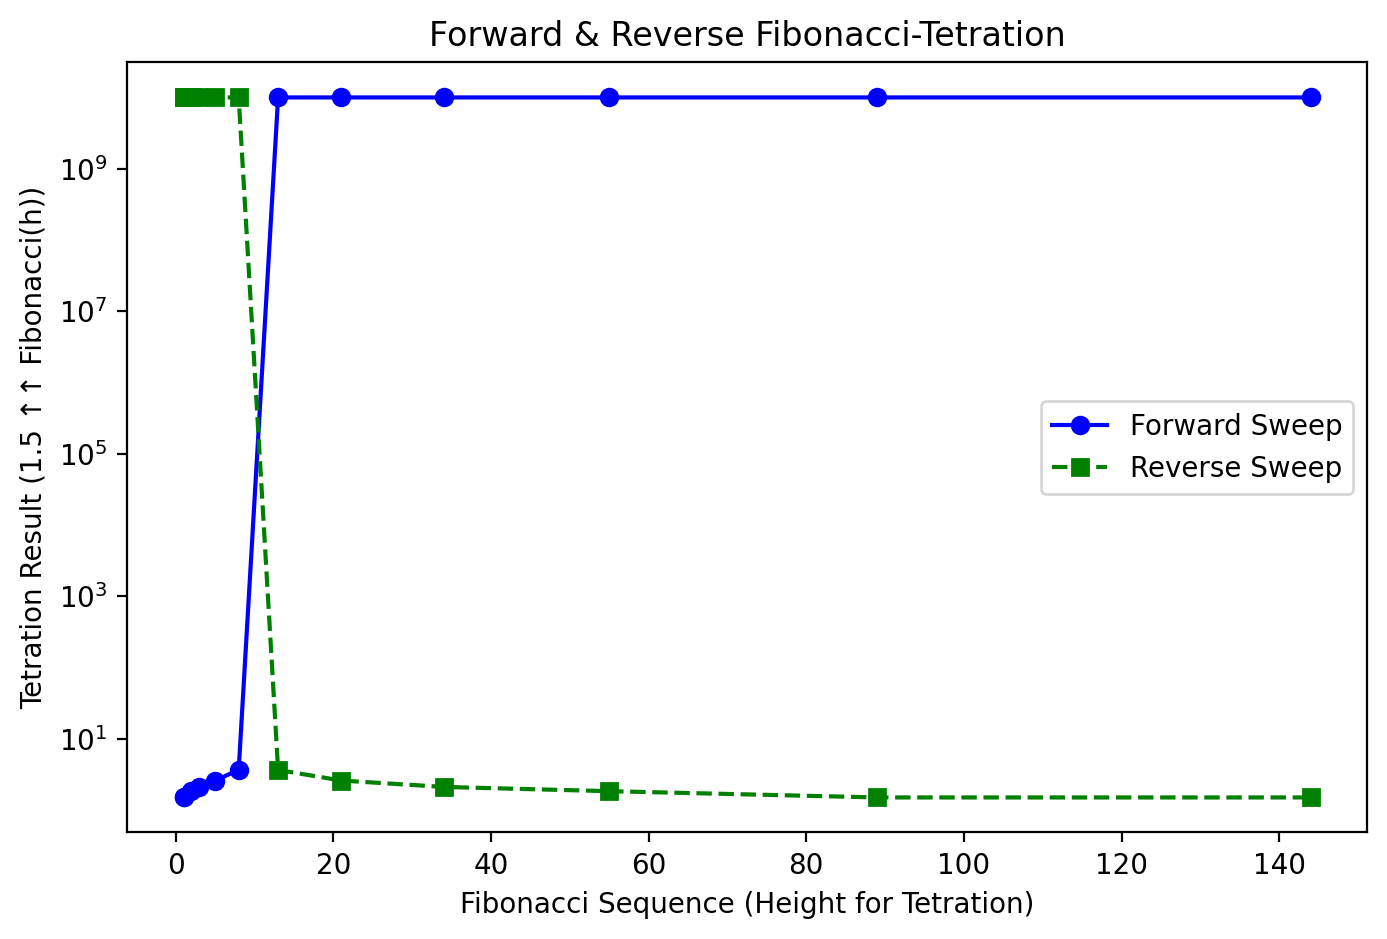

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def fibonacci(n):
    """Generates the first n Fibonacci numbers."""
    fib_seq = [1, 1]
    for _ in range(n - 2):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

def tetration(base, height):
    """Computes tetration iteratively to prevent recursion issues."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Prevent overflow
            return float('inf')
    return result

# Generate Fibonacci sequence for tetration heights
num_terms = 12
fib_heights = fibonacci(num_terms)

# Compute forward tetration values
base = 1.5
forward_tetration = [tetration(base, h) for h in fib_heights]
reverse_tetration = [tetration(base, h) for h in reversed(fib_heights)]  # Reverse sweep

# Convert infinities to a max value for plotting
forward_tetration = np.array(forward_tetration)
reverse_tetration = np.array(reverse_tetration)
forward_tetration[forward_tetration == float('inf')] = 1e10
reverse_tetration[reverse_tetration == float('inf')] = 1e10

# Plot Forward & Reverse Fibonacci-Tetration
plt.figure(figsize=(8, 5))
plt.plot(fib_heights, forward_tetration, marker='o', linestyle='-', color='b', label="Forward Sweep")
plt.plot(fib_heights, reverse_tetration, marker='s', linestyle='--', color='g', label="Reverse Sweep")
plt.yscale('log')  # Log scale for extreme growth
plt.xlabel("Fibonacci Sequence (Height for Tetration)")
plt.ylabel(f"Tetration Result ({base} ↑↑ Fibonacci(h))")
plt.title("Forward & Reverse Fibonacci-Tetration")
# plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

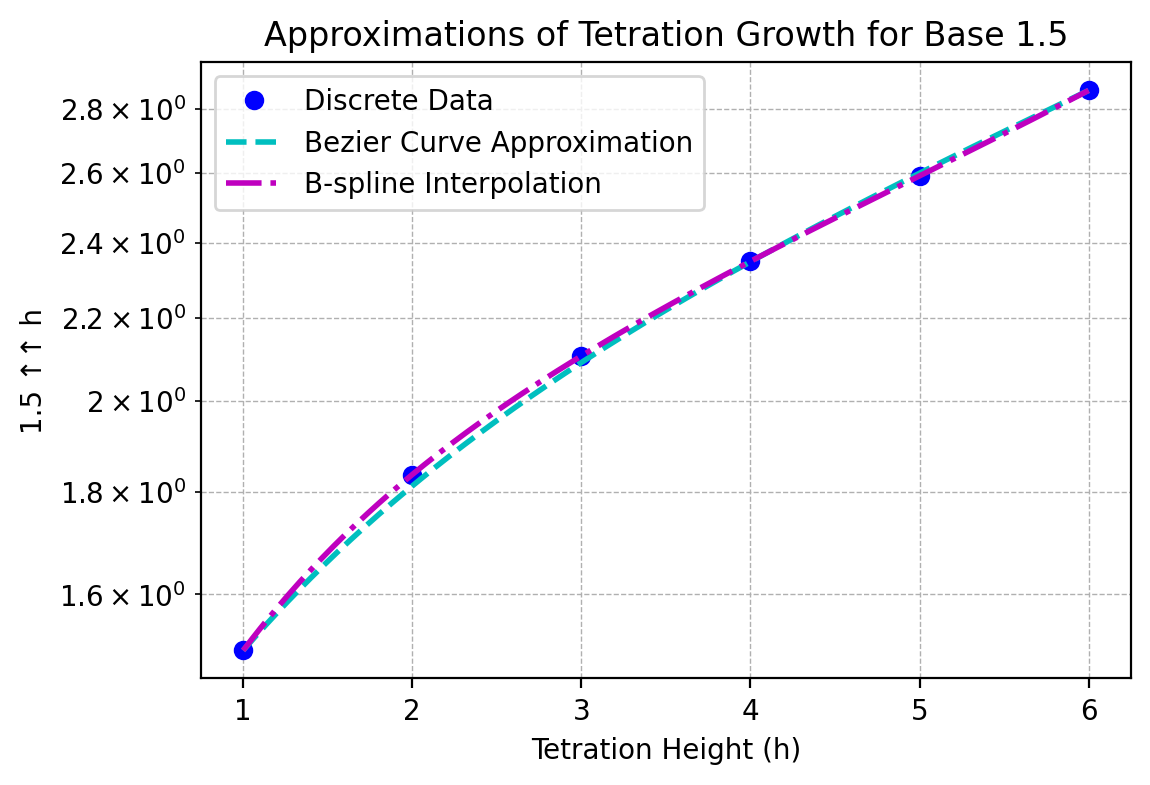

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def tetration(base, height):
    """Computes tetration of base to the given height."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Prevent excessive growth
            return float('inf')
    return result

# Parameters
base = 1.5      # Base for tetration
max_height = 6  # Tetration height range

# Compute discrete tetration values for heights 1 through max_height.
heights = np.array(range(1, max_height + 1))
values = np.array([tetration(base, h) for h in heights])

# Create a dense grid for interpolation (for the B-spline).
h_dense = np.linspace(heights[0], heights[-1], 300)

# --- Bezier Curve Approximation ---
# We treat the discrete (height, value) pairs as control points.
control_points = np.column_stack((heights, values))

def bezier(points, t):
    """Compute a point on the Bezier curve using the De Casteljau algorithm."""
    points = np.array(points)
    n = len(points)
    for r in range(1, n):
        points = (1 - t) * points[:-1] + t * points[1:]
    return points[0]

# Compute a dense set of points on the Bezier curve.
t_vals = np.linspace(0, 1, 300)
bezier_curve = np.array([bezier(control_points, t) for t in t_vals])
h_bezier = bezier_curve[:, 0]
values_bezier = bezier_curve[:, 1]

# --- B-spline Interpolation ---
spline = make_interp_spline(heights, values, k=3)
values_spline = spline(h_dense)

# --- Plotting ---
plt.figure(figsize=(6, 4))
# Plot the original discrete tetration data.
plt.plot(heights, values, 'o', label='Discrete Data', color='b')
# Plot the Bezier curve approximation.
plt.plot(h_bezier, values_bezier, '--', label='Bezier Curve Approximation', color='c', linewidth=2)
# Plot the cubic B-spline interpolation.
plt.plot(h_dense, values_spline, '-.', label='B-spline Interpolation',  color='m', linewidth=2)

plt.yscale('log')  # Use a logarithmic scale for y due to rapid growth.
plt.xlabel("Tetration Height (h)")
plt.ylabel(f"{base} ↑↑ h")
plt.title(f"Approximations of Tetration Growth for Base {base}")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

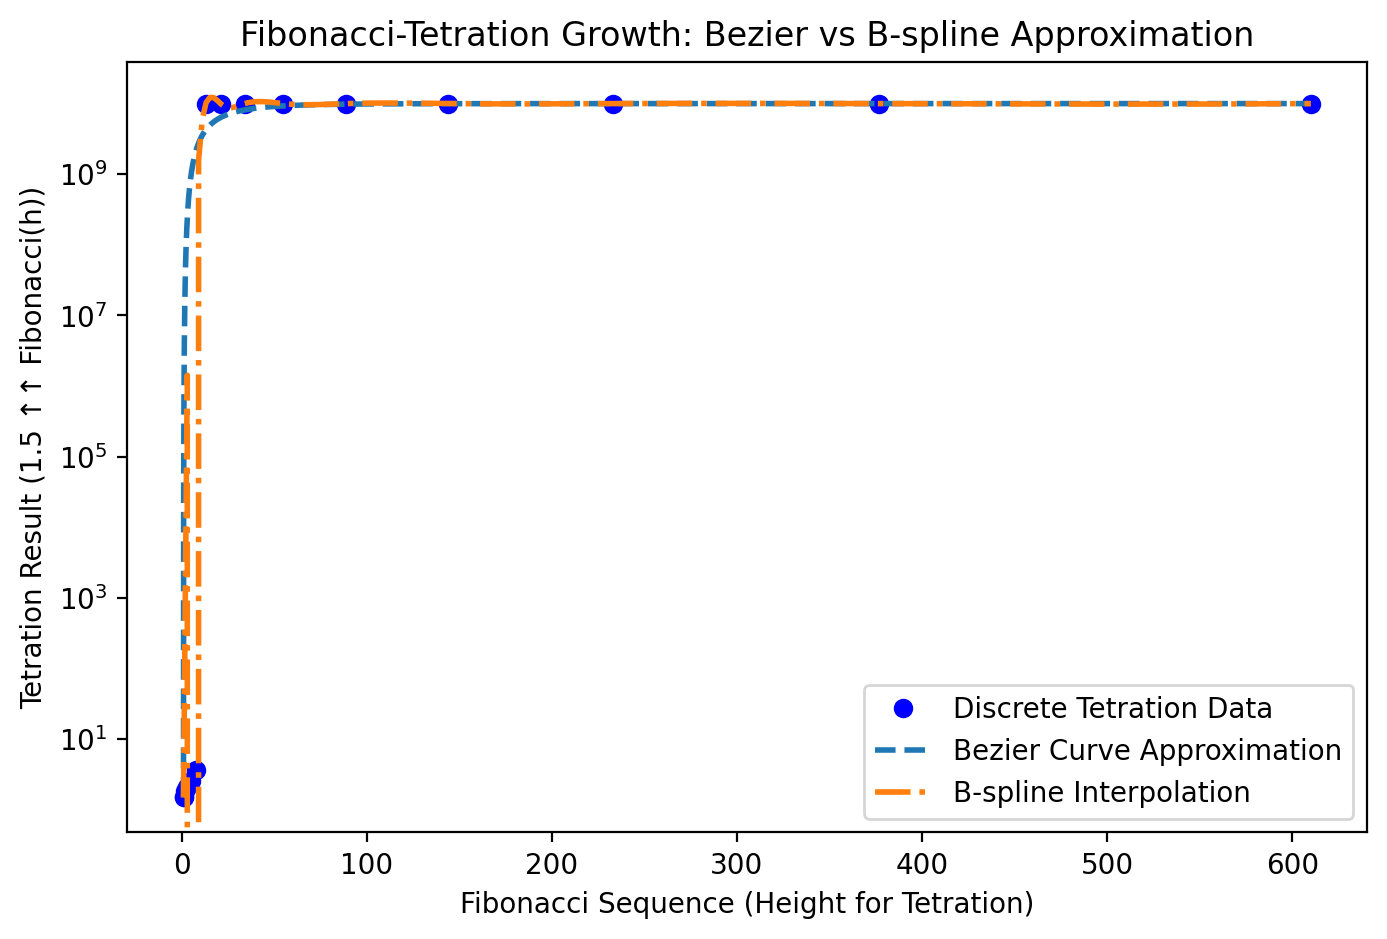

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def fibonacci(n):
    """Generates the first n Fibonacci numbers."""
    fib_seq = [1, 1]
    for _ in range(n - 2):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

def tetration(base, height):
    """Computes tetration iteratively to prevent recursion issues."""
    result = base
    for _ in range(height - 1):
        result = base ** result
        if result > 1e10:  # Cap to prevent extreme growth
            return float('inf')
    return result

# Parameters
num_terms = 15   # Number of Fibonacci numbers to generate
base = 1.5       # Base for tetration

# Generate Fibonacci sequence and compute tetration values.
fib_heights = np.array(fibonacci(num_terms))
tetration_values = np.array([tetration(base, h) for h in fib_heights])
# Replace infinite values with a large number for plotting.
tetration_values[tetration_values == float('inf')] = 1e10

# Remove duplicate x-values for B-spline interpolation.
unique_fib_heights, unique_indices = np.unique(fib_heights, return_index=True)
unique_tetration_values = tetration_values[unique_indices]

# --- Bezier Curve Approximation ---
# Use the discrete (Fibonacci, tetration) pairs as control points.
control_points = np.column_stack((fib_heights, tetration_values))

def bezier(points, t):
    """Compute a point on the Bezier curve using the De Casteljau algorithm."""
    points = np.array(points)
    n = len(points)
    for r in range(1, n):
        points = (1 - t) * points[:-1] + t * points[1:]
    return points[0]

# Evaluate the Bezier curve for 300 parameter values in [0, 1].
t_vals = np.linspace(0, 1, 300)
bezier_curve = np.array([bezier(control_points, t) for t in t_vals])
x_bezier = bezier_curve[:, 0]
y_bezier = bezier_curve[:, 1]

# --- B-spline Interpolation ---
# Create a dense set of x-values spanning the unique Fibonacci sequence.
x_dense = np.linspace(unique_fib_heights[0], unique_fib_heights[-1], 300)
spline = make_interp_spline(unique_fib_heights, unique_tetration_values, k=3)
y_spline = spline(x_dense)

# --- Plotting ---
plt.figure(figsize=(8, 5))
# Plot the original discrete data.
plt.plot(fib_heights, tetration_values, 'o', label="Discrete Tetration Data", color='b')
# Plot the Bezier curve approximation.
plt.plot(x_bezier, y_bezier, '--', label="Bezier Curve Approximation", linewidth=2)
# Plot the cubic B-spline interpolation.
plt.plot(x_dense, y_spline, '-.', label="B-spline Interpolation", linewidth=2)

plt.yscale('log')  # Log scale to handle extreme growth.
plt.xlabel("Fibonacci Sequence (Height for Tetration)")
plt.ylabel(f"Tetration Result ({base} ↑↑ Fibonacci(h))")
plt.title("Fibonacci-Tetration Growth: Bezier vs B-spline Approximation")
plt.legend()
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()